PROJECT

PROBLEM: CLASSIFICATION PROBLEM

AIM: To Predict Loan Default and Repayment Behaviour by Customers using the Demographic of the Customer and their Previous Loan History

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data from csv

In [2]:
Performance_data = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv')
Demographic_data = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv')
Previous_loan_data = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv')

Data understanding for Performance_data

In [3]:
Performance_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [4]:
Performance_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [5]:
Performance_data.shape

(4368, 10)

In [6]:
Performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


Descriptive Statistic for Performance_data

In [7]:
Performance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
systemloanid,4368.0,3.019810e+08,13431.151516,301958485.0,301969128.0,301980100.0,301993503.5,302004050.0
loannumber,4368.0,5.172390e+00,3.653569,2.0,2.0,4.0,7.0,27.0
loanamount,4368.0,1.780907e+04,10749.694571,10000.0,10000.0,10000.0,20000.0,60000.0
totaldue,4368.0,2.125738e+04,11943.510416,10000.0,13000.0,13000.0,24500.0,68100.0
termdays,4368.0,2.926168e+01,11.512519,15.0,30.0,30.0,30.0,90.0



Check for missing values for Performance_data

In [8]:
Performance_data.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

Check for the percentage(%) of missing values for Performance_data

In [9]:
Performance_data.isna().sum().sort_values(ascending=False)/len(Demographic_data)*100

referredby       86.99954
customerid        0.00000
systemloanid      0.00000
loannumber        0.00000
approveddate      0.00000
creationdate      0.00000
loanamount        0.00000
totaldue          0.00000
termdays          0.00000
good_bad_flag     0.00000
dtype: float64

Drop columns with 80% missing value and not an important column to the dataset for Performance_data

In [10]:
Performance_data.drop(columns=['referredby'], inplace = True)

Check for duplicates for Performance_data

In [11]:
Performance_data.duplicated().sum()

np.int64(0)

Data understanding for Demographic_data

In [12]:
Demographic_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [13]:
Demographic_data.shape

(4346, 9)

In [14]:
Demographic_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [15]:
Demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [16]:
Demographic_data.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


Descriptive statistic for Demographic_data

In [17]:
Demographic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude_gps,4346.0,4.626189,7.184832,-118.247009,3.354953,3.593302,6.545220,151.209290
latitude_gps,4346.0,7.251356,3.055052,-33.868818,6.470610,6.621888,7.425052,71.228069


Check for missing values for Demographic_data

In [18]:
Demographic_data.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64


Check for the percentage(%) of missing values for Demographic_data

In [19]:
Demographic_data.isna().sum().sort_values(ascending=False)/len(Performance_data)*100

bank_branch_clients           98.328755
level_of_education_clients    86.057692
employment_status_clients     14.835165
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

Check for duplicates for Demographic_data

In [20]:
Demographic_data.duplicated().sum()

np.int64(12)

Drop duplicates for Demographic_data

In [21]:
Demographic_data.drop_duplicates(inplace = True)

Data understanding for Previous_loan_data

In [22]:
Previous_loan_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [23]:
Previous_loan_data.shape

(18183, 12)

In [24]:
Previous_loan_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [25]:
Previous_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [26]:
Previous_loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
systemloanid,18183.0,3.018395e+08,93677.672704,301600134.0,301776577.0,301854965.0,301919682.5,302000275.0
loannumber,18183.0,4.189353e+00,3.249490,1.0,2.0,3.0,6.0,26.0
loanamount,18183.0,1.650124e+04,9320.547516,3000.0,10000.0,10000.0,20000.0,60000.0
totaldue,18183.0,1.957320e+04,10454.245277,3450.0,11500.0,13000.0,24500.0,68100.0
termdays,18183.0,2.669279e+01,10.946556,15.0,15.0,30.0,30.0,90.0


Check for missing values for Previous_loan_data

In [27]:
Previous_loan_data.isna().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

Check for the percentage(%) of missing values for Previous_loan_data

In [28]:
Previous_loan_data.isna().sum().sort_values(ascending=False)/len(Previous_loan_data)*100

referredby         94.357367
customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

Drop columns with 80% missing value and not an important column to the dataset ;for Previous_loan_data

In [29]:
Previous_loan_data.drop(columns=['referredby'], inplace = True)

Check for duplicates for Previous_loan_data

In [30]:
Previous_loan_data.duplicated().sum()

np.int64(0)

In [31]:
Previous_loan_data['customerid'].unique()

array(['8a2a81a74ce8c05d014cfb32a0da1049',
       '8a8588f35438fe12015444567666018e',
       '8a85890754145ace015429211b513e16', ...,
       '8a858f6459b6456d0159b69978f22bed',
       '8a858fad5ccb633e015ccbe337372ab3',
       '8a858f0656b7820c0156c92ca3ba436f'], shape=(4359,), dtype=object)

In [32]:
Previous_loan_data['systemloanid'].unique()

array([301682320, 301883808, 301831714, ..., 301631653, 301697691,
       301715255], shape=(18183,))

In [33]:
Previous_loan_data['systemloanid'].count()

np.int64(18183)

Feature Engineering: Previous_loan_data has repeated numbers of customers. Inorder to get the unique customers for Previous_loan_data, a new column will be created. Thus:
First; Covert dates of the needed column of Previous_loan_data to datetime.
Then; Create your feature engineering

For my feature engineering, I want to get the customer's payment behaviour. So, I engineered my features as shown below

In [34]:
Previous_loan_data['firstduedate'] = pd.to_datetime(Previous_loan_data['firstduedate'], errors = 'coerce')
Previous_loan_data['firstrepaiddate'] = pd.to_datetime(Previous_loan_data['firstrepaiddate'], errors = 'coerce')


In [35]:
Previous_loan_data['On_Time_Repayment'] = (Previous_loan_data['firstrepaiddate'] <= Previous_loan_data['firstduedate']).astype(int)
Previous_loan_data['Late_Time_Repayment'] = (Previous_loan_data['firstrepaiddate'] > Previous_loan_data['firstduedate']).astype(int)
Previous_loan_data['Default_Time_Repayment'] = Previous_loan_data['firstrepaiddate'].isna().astype(int)

In [36]:
Previous_loan_data_repayment = Previous_loan_data.groupby('customerid')[['On_Time_Repayment','Late_Time_Repayment','Default_Time_Repayment']].sum().reset_index()
Previous_loan_data_repayment.head()

,customerid,On_Time_Repayment,Late_Time_Repayment,Default_Time_Repayment
0,8a1088a0484472eb01484669e3ce4e0b,0,1,0
1,8a1a1e7e4f707f8b014f797718316cad,2,2,0
2,8a1a32fc49b632520149c3b8fdf85139,3,4,0
3,8a1eb5ba49a682300149c3c068b806c7,6,2,0
4,8a1edbf14734127f0147356fdb1b1eb2,1,1,0


From the above feature engineering, it denoted the number of times a customer repaid a loan on time and at a later time. Also, the default time shows the number of times a customer never repaid a loan collected.

In [37]:
Previous_loan_data_repayment['customerid'].unique()

array(['8a1088a0484472eb01484669e3ce4e0b',
       '8a1a1e7e4f707f8b014f797718316cad',
       '8a1a32fc49b632520149c3b8fdf85139', ...,
       '8a858fff5a36fe68015a3ac5851618ab',
       '8a858fff5a36fe68015a3b8dcb8a3843',
       '8a858fff5c79144c015c7bdbfc086ce1'], shape=(4359,), dtype=object)

In [38]:
Previous_loan_data_repayment.shape

(4359, 4)

Merge the 3 dataset on the customerid column (Demographic_data, Performance_data and Previous_loan_data_repayment)

In [39]:
df_merge = Performance_data.merge(Demographic_data, on = 'customerid', how = 'left' )
df_merge.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [40]:
df = df_merge.merge(Previous_loan_data_repayment, on = 'customerid', how = 'left' )
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,On_Time_Repayment,Late_Time_Repayment,Default_Time_Repayment
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,7.0,4.0,0.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,3.0,3.0,0.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN,0.0,2.0,0.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,8.0,0.0,0.0


Data understanding for the merged dataset(df)

In [41]:
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,On_Time_Repayment,Late_Time_Repayment,Default_Time_Repayment
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,7.0,4.0,0.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,3.0,3.0,0.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN,0.0,2.0,0.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,8.0,0.0,0.0


In [42]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'On_Time_Repayment',
       'Late_Time_Repayment', 'Default_Time_Repayment'],
      dtype='object')

In [43]:
df.shape

(4368, 20)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   birthdate                   3269 non-null   object 
 10  bank_account_type           3269 non-null   object 
 11  longitude_gps               3269 non-null   float64
 12  latitude_gps                3269 non-null   float64
 13  bank_name_clients           3269 

From the above information, I observed that the datatypes are corresponding, i.e, it is as it should be

Descriptive statistic for df

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
systemloanid,4368.0,3.019810e+08,13431.151516,3.019585e+08,3.019691e+08,3.019801e+08,3.019935e+08,3.020040e+08
loannumber,4368.0,5.172390e+00,3.653569,2.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,2.700000e+01
loanamount,4368.0,1.780907e+04,10749.694571,1.000000e+04,1.000000e+04,1.000000e+04,2.000000e+04,6.000000e+04
totaldue,4368.0,2.125738e+04,11943.510416,1.000000e+04,1.300000e+04,1.300000e+04,2.450000e+04,6.810000e+04
termdays,4368.0,2.926168e+01,11.512519,1.500000e+01,3.000000e+01,3.000000e+01,3.000000e+01,9.000000e+01
longitude_gps,3269.0,4.530975e+00,7.925454,-1.182470e+02,3.354842e+00,3.584222e+00,6.439855e+00,1.512093e+02
latitude_gps,3269.0,7.290383e+00,3.269601,-3.386882e+01,6.473645e+00,6.625681e+00,7.426745e+00,7.122807e+01
On_Time_Repayment,4359.0,2.683643e+00,2.874886,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.500000e+01
Late_Time_Repayment,4359.0,1.487727e+00,1.860133,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.200000e+01
Default_Time_Repayment,4359.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Observation: Outliers are present 

Check for missing values

In [46]:
df.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4335
employment_status_clients     1592
level_of_education_clients    3925
On_Time_Repayment                9
Late_Time_Repayment              9
Default_Time_Repayment           9
dtype: int64

Check for the percentage of missing values

In [47]:
df.isna().sum().sort_values(ascending = False) / len(df) * 100

bank_branch_clients           99.244505
level_of_education_clients    89.858059
employment_status_clients     36.446886
bank_account_type             25.160256
longitude_gps                 25.160256
bank_name_clients             25.160256
latitude_gps                  25.160256
birthdate                     25.160256
Late_Time_Repayment            0.206044
On_Time_Repayment              0.206044
Default_Time_Repayment         0.206044
systemloanid                   0.000000
good_bad_flag                  0.000000
termdays                       0.000000
totaldue                       0.000000
loanamount                     0.000000
creationdate                   0.000000
approveddate                   0.000000
loannumber                     0.000000
customerid                     0.000000
dtype: float64

Drop columns with 80% missing value and not an important column to the dataset for df1

In [48]:
df.drop(columns=['level_of_education_clients', 'bank_branch_clients'], inplace = True)

Check for columns with missing values and fill them

In [49]:
df['employment_status_clients'].isna().sum()

np.int64(1592)

In [50]:
df['employment_status_clients'] = df['employment_status_clients'].fillna('Unknown')

In [51]:
df['bank_account_type'].isna().sum()

np.int64(1099)

In [52]:
df['bank_account_type'] = df['bank_account_type'].fillna('NA')

In [53]:
df['longitude_gps'].isna().sum()

np.int64(1099)

In [54]:
df['longitude_gps'] = df['longitude_gps'].fillna('Not Given')

In [55]:
df['latitude_gps'].isna().sum()

np.int64(1099)

In [56]:
df['latitude_gps'] = df['latitude_gps'].fillna('Not Given')

In [57]:
df['bank_name_clients'].isna().sum()

np.int64(1099)

In [58]:
df['bank_name_clients'] = df['bank_name_clients'].fillna('NA')

In [59]:
df['birthdate'].isna().sum()

np.int64(1099)

In [60]:
df['birthdate'] = df['birthdate'].fillna('Unknown')

In [61]:
df['Late_Time_Repayment'] = df['Late_Time_Repayment'].fillna(0)

In [62]:
df['On_Time_Repayment'] = df['On_Time_Repayment'].fillna(0)

In [63]:
df['Default_Time_Repayment'] = df['Default_Time_Repayment'].fillna(0)

In [64]:
df.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
On_Time_Repayment            0
Late_Time_Repayment          0
Default_Time_Repayment       0
dtype: int64

Check for Duplicates

In [65]:
df.duplicated().sum()

np.int64(0)

Observation: No duplicates found

Feature Engineering: Convert Columns with Dates to datetime 

In [66]:
df['approveddate'] = pd.to_datetime(df['approveddate'], errors = 'coerce')
df['creationdate'] = pd.to_datetime(df['creationdate'], errors = 'coerce')
df['birthdate'] = pd.to_datetime(df['birthdate'], errors = 'coerce')

Seperate into Categorical and Numerical Column

In [67]:
num_cols =df.select_dtypes(include = np.number).columns.tolist()
cat_cols =df.select_dtypes(include = 'object').columns.tolist()

Check Categorical Columns in order to see if there's need for Grouping or Encoding




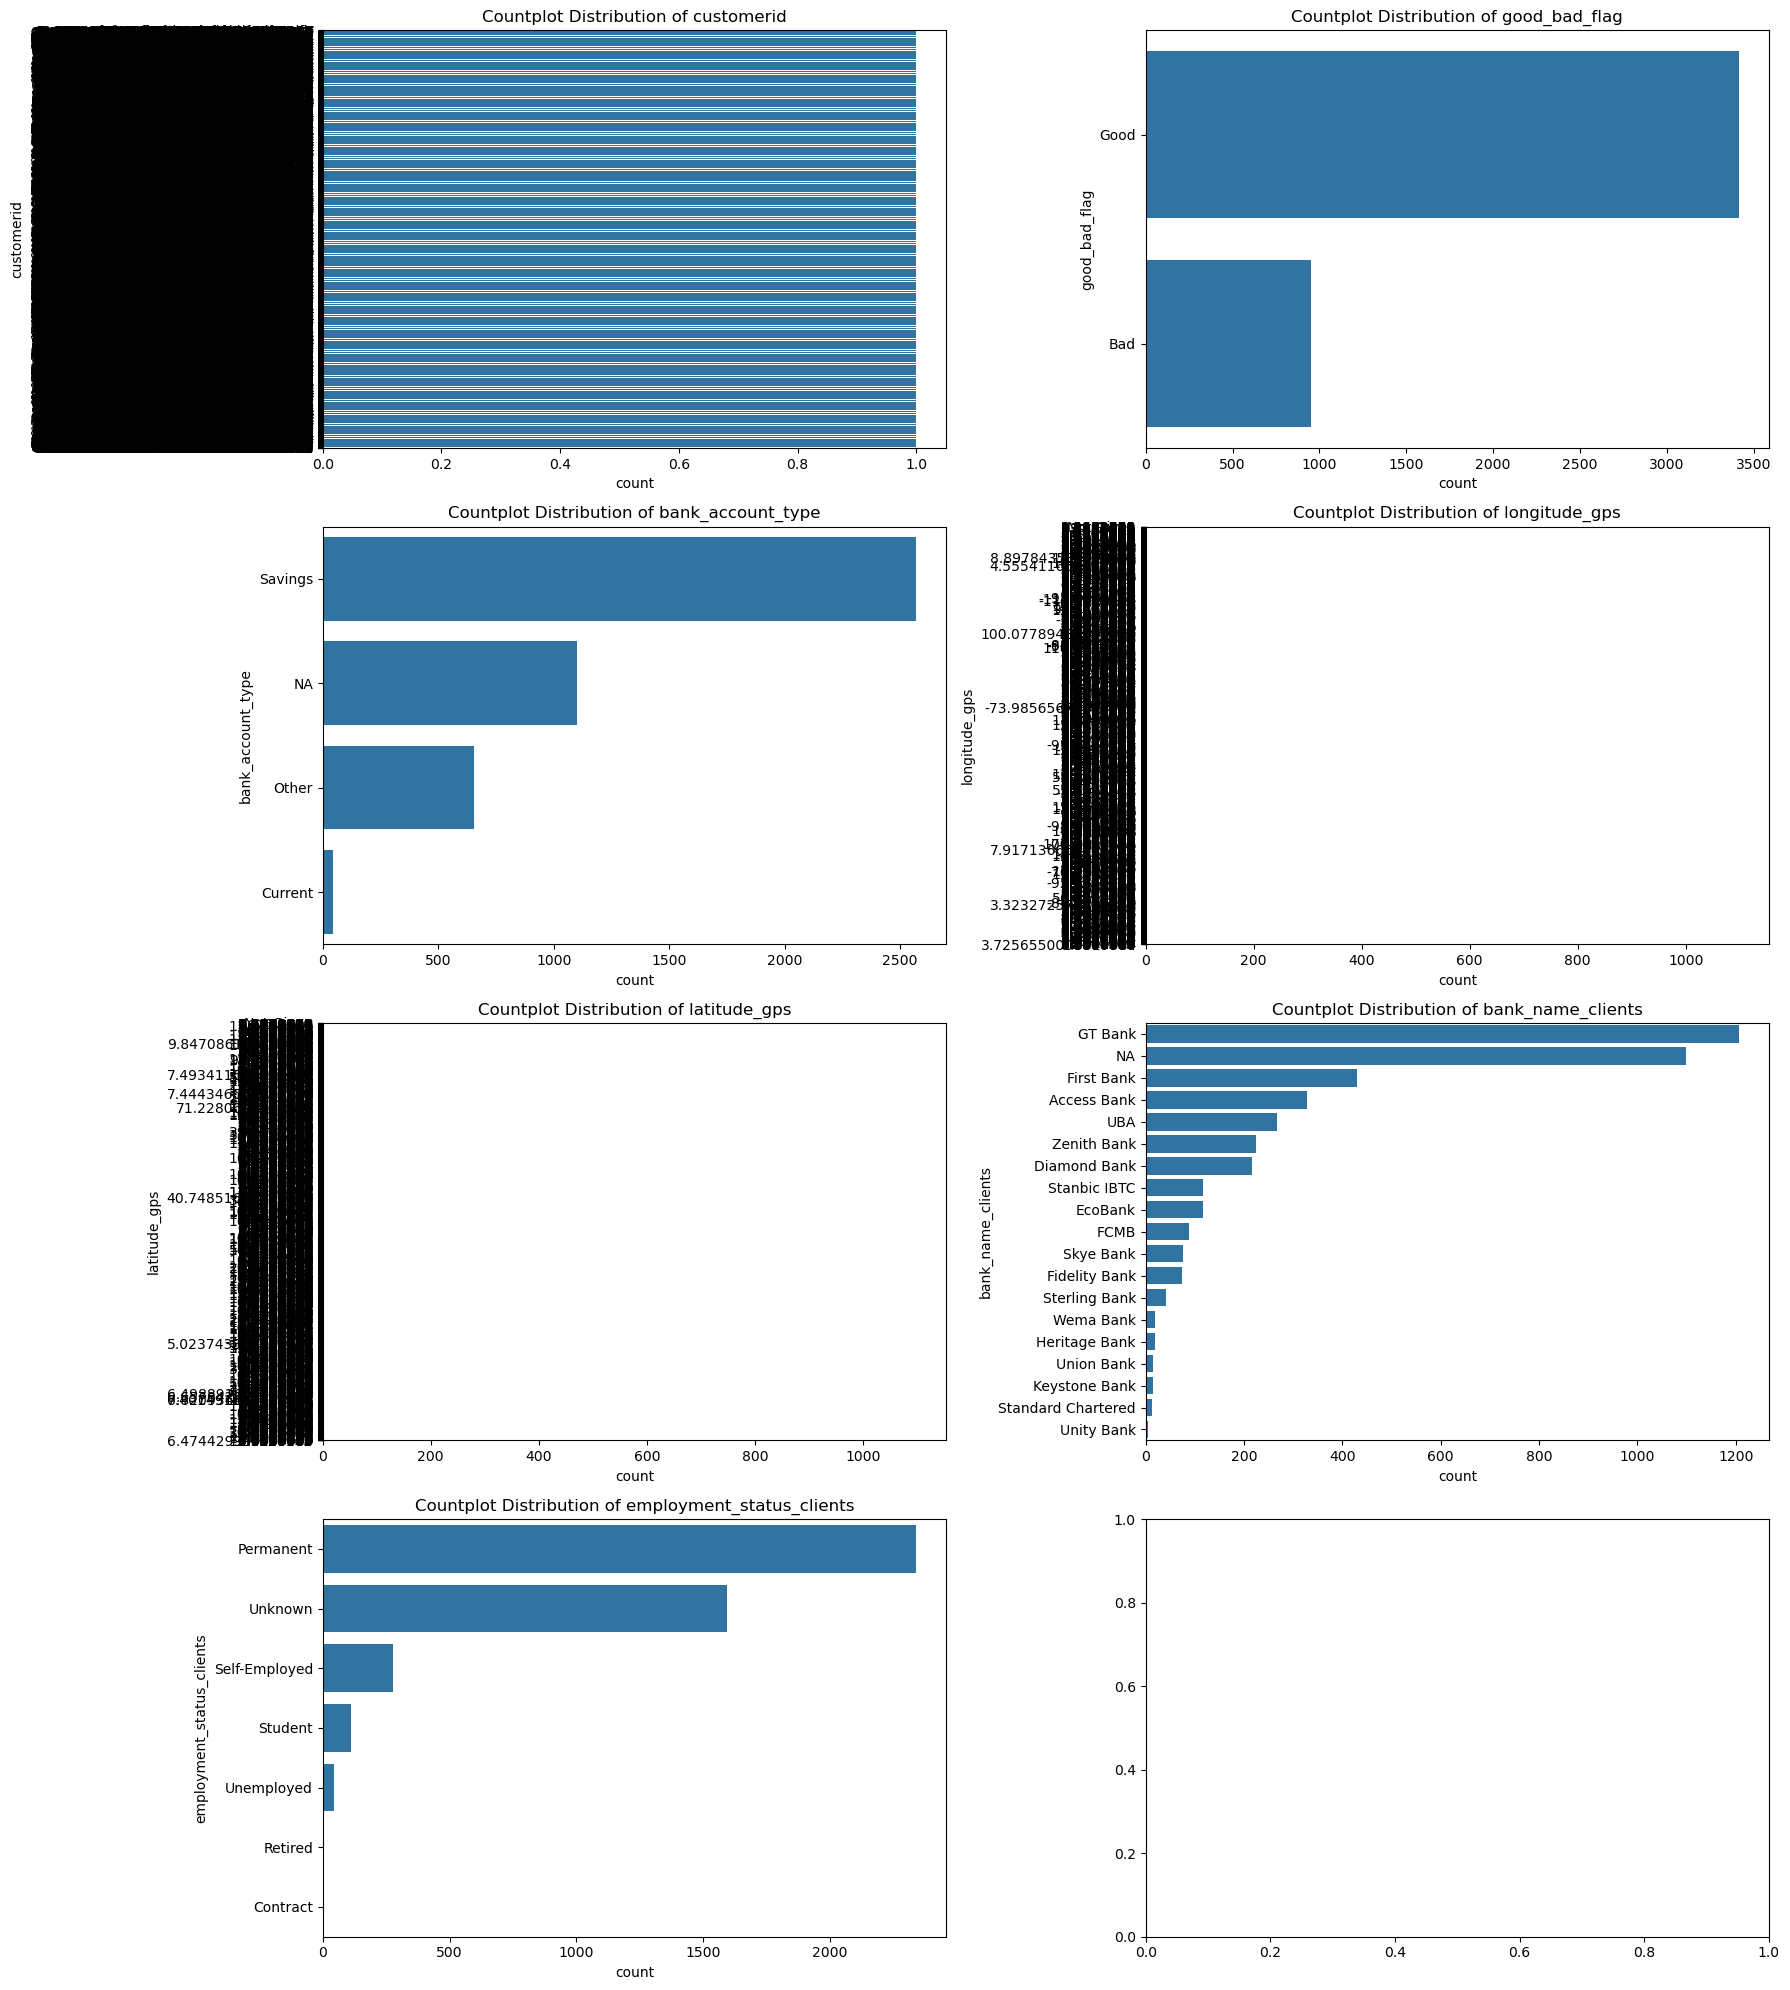

In [68]:
n = len(cat_cols)
rows = (n + 1) // 2
fig, axes = plt.subplots(nrows = rows, ncols = 2, figsize = (18, 5*rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(df[col], ax = axes[i], order = df[col].value_counts().index)
    axes[i].set_title(f'Countplot Distribution of {col}')
plt.tight_layout()
plt.show()

Visualization of Numerical Columns to Check for Outliers

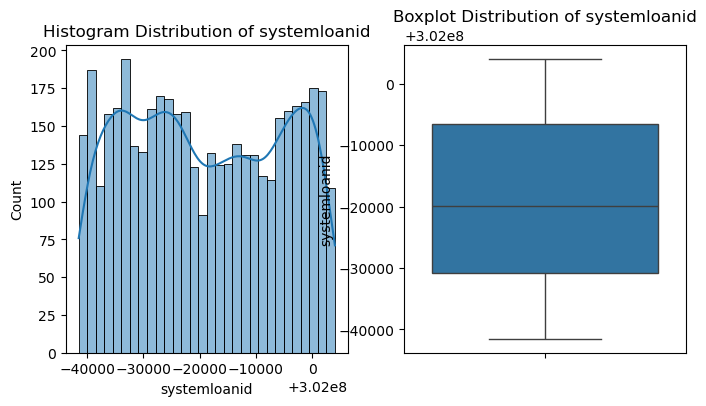

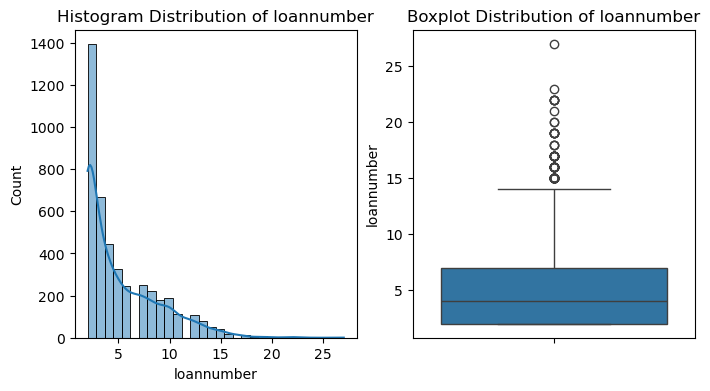

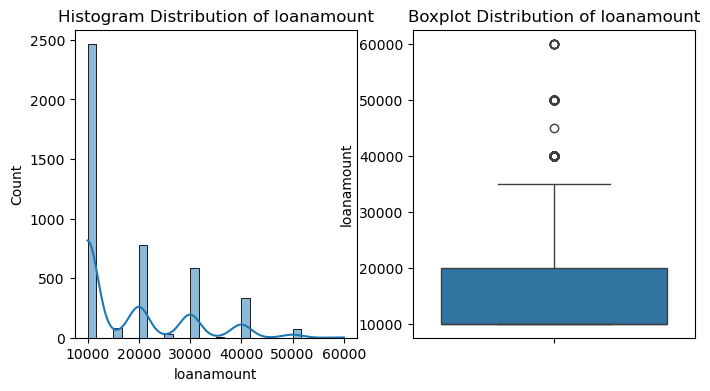

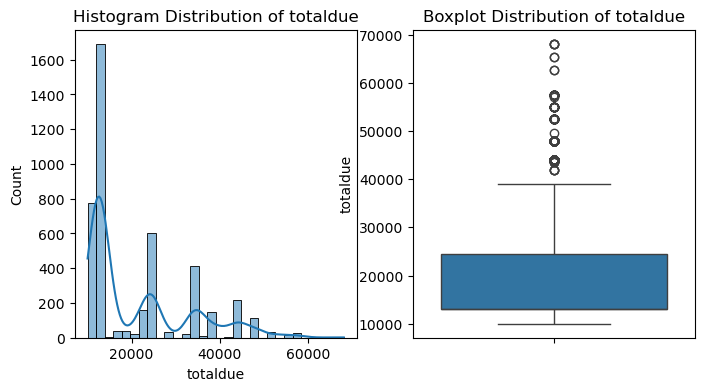

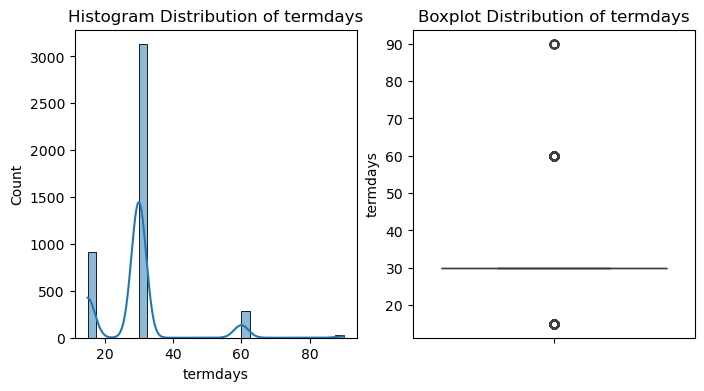

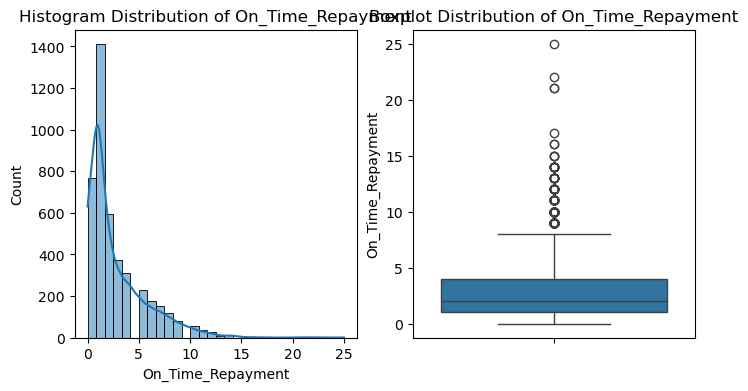

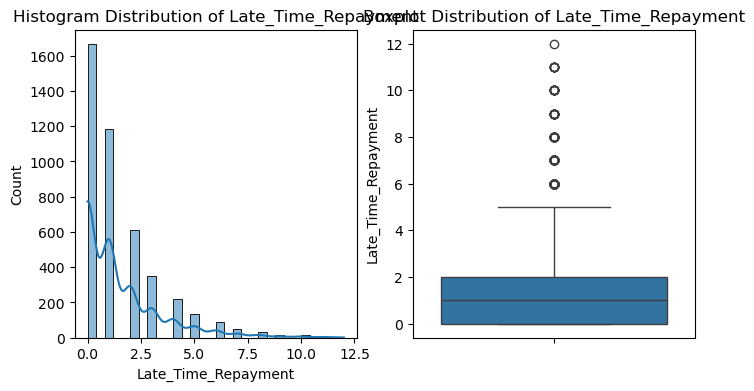

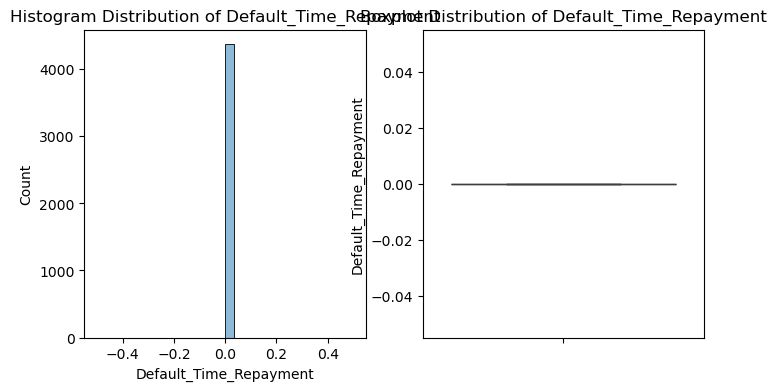

In [69]:
#Numerical plots
for col in num_cols:
    plt.figure(figsize = (8,4))
    #Histogram plot
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins = 30, kde = True)
    plt.title(f'Histogram Distribution of {col}')
    #Box plot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot Distribution of {col}')
    plt.show()

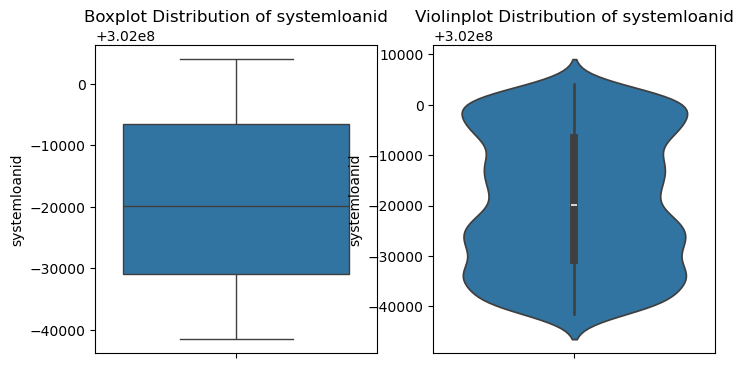

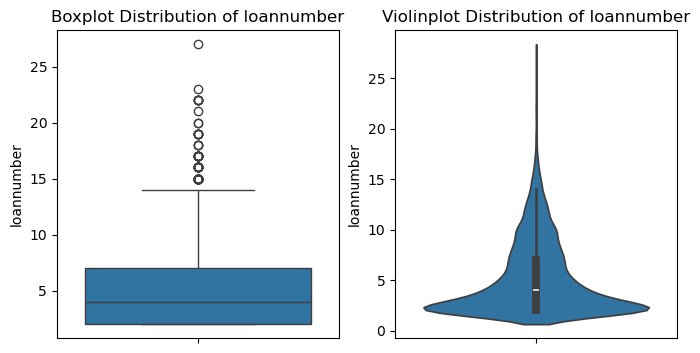

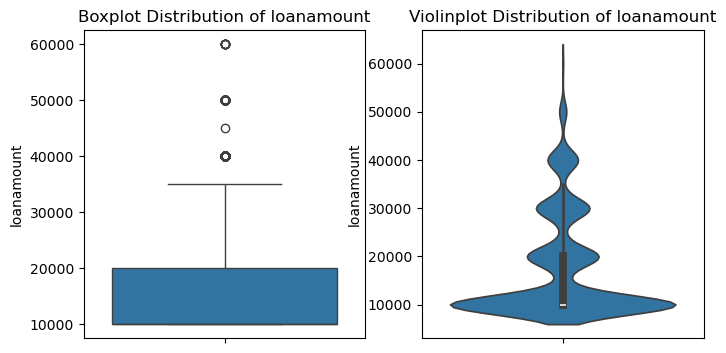

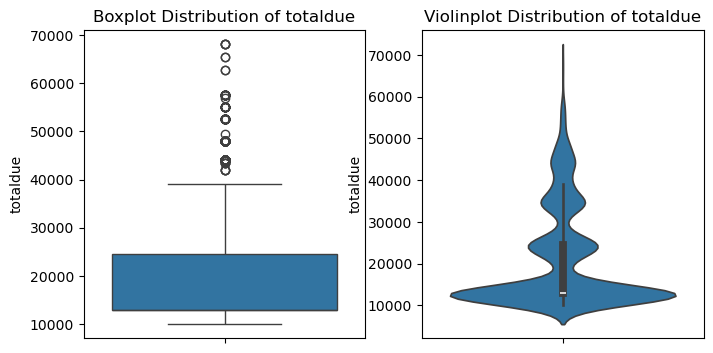

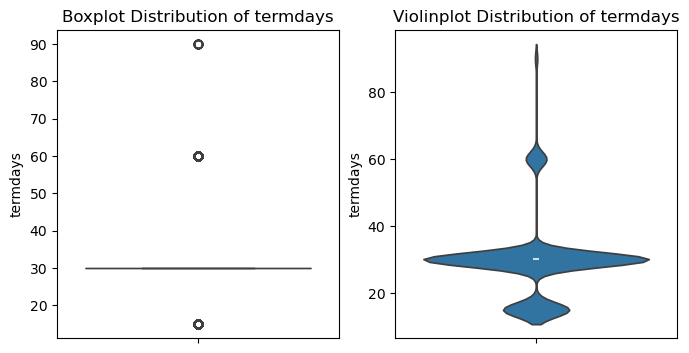

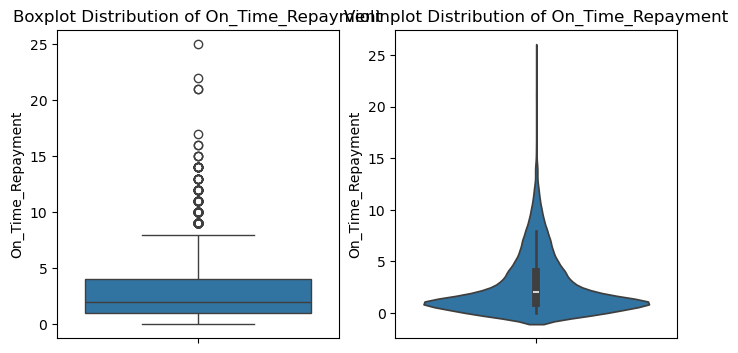

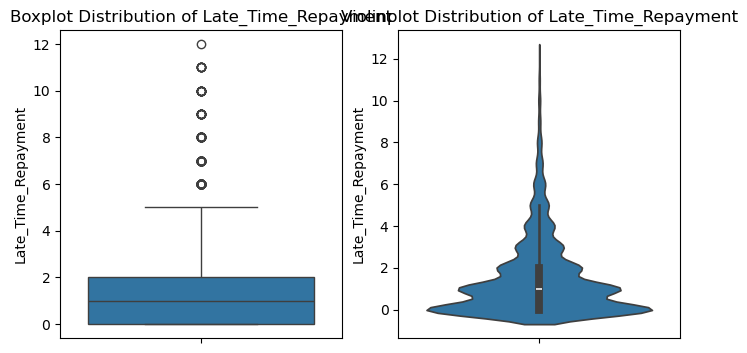

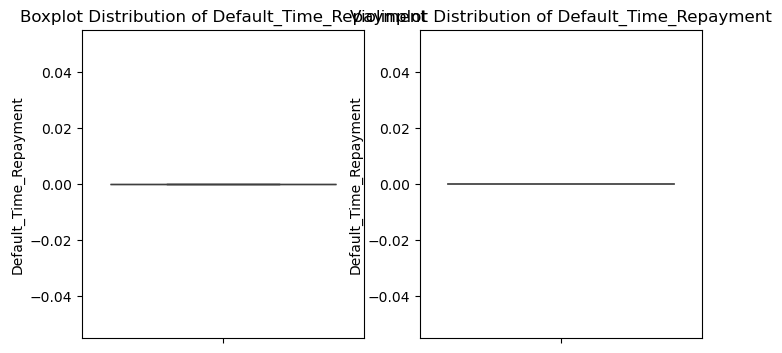

In [70]:
for col in num_cols:
    plt.figure(figsize = (8,4))
    #Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot Distribution of {col}')
    #Violin plot
    plt.subplot(1,2,2)
    sns.violinplot(df[col])
    plt.title(f'Violinplot Distribution of {col}')
    plt.show()

Observation: all the numerical columns have outliers except systemloanid. This is because the columns are not normally skewed, they are either skewed to the left or right.

Calculate Skewness

In [71]:
num_cols_skewness = df[num_cols].skew().sort_values(ascending = False)
num_cols_skewness

termdays                  1.932360
Late_Time_Repayment       1.837241
On_Time_Repayment         1.708330
loannumber                1.304398
loanamount                1.250938
totaldue                  1.165669
systemloanid              0.052250
Default_Time_Repayment    0.000000
dtype: float64

Handle Outliers by using Winsorization method(i.e, by capping them) with a default factor of 1.5



In [72]:
for col in num_cols:
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[num_cols] = np.where(df[num_cols] < lower_bound, lower_bound,
                     np.where(df[num_cols] > upper_bound, upper_bound, df[num_cols]))

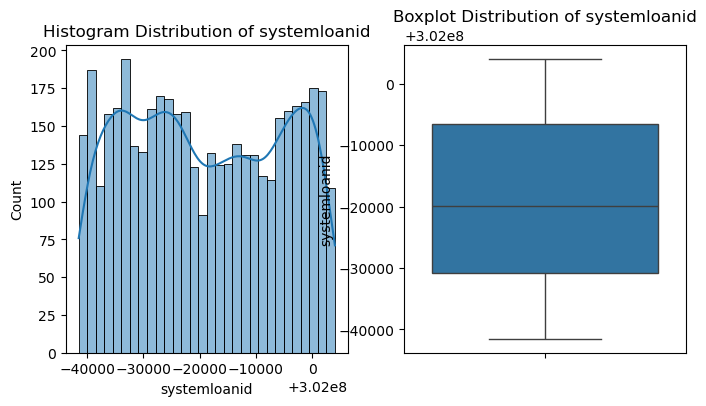

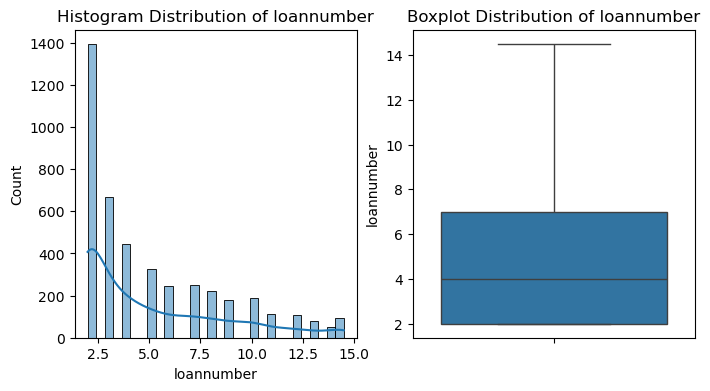

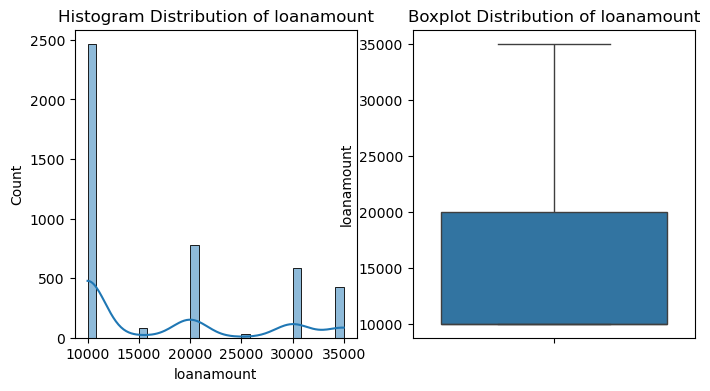

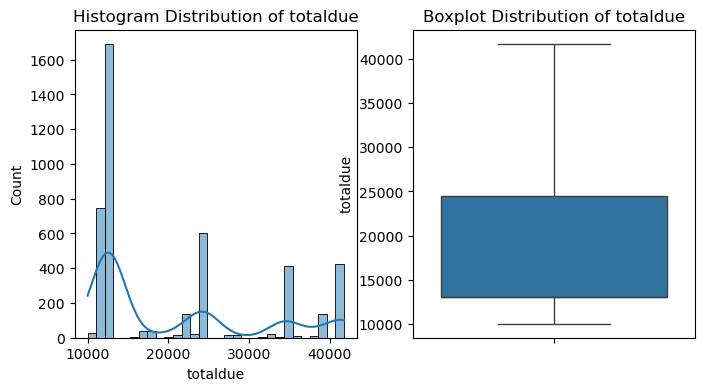

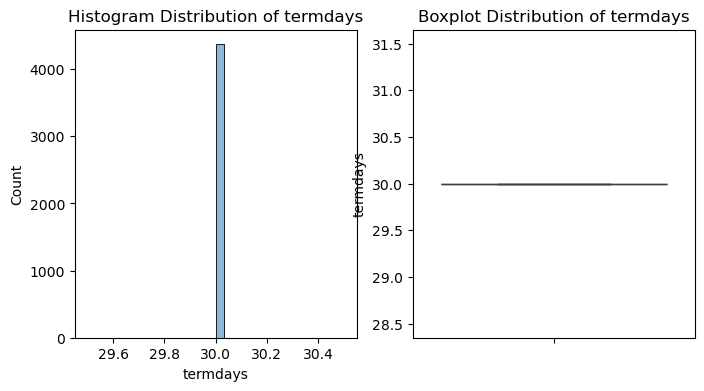

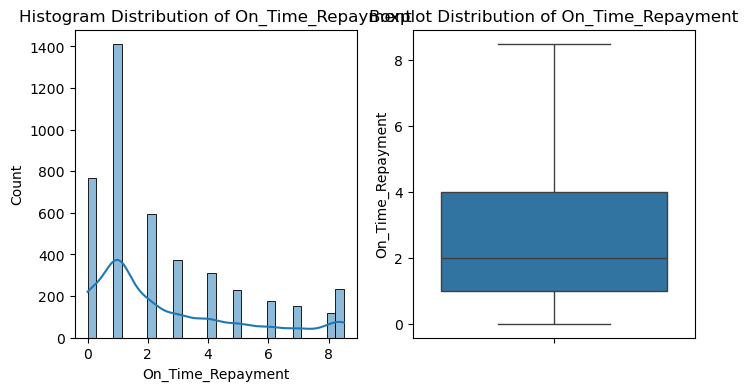

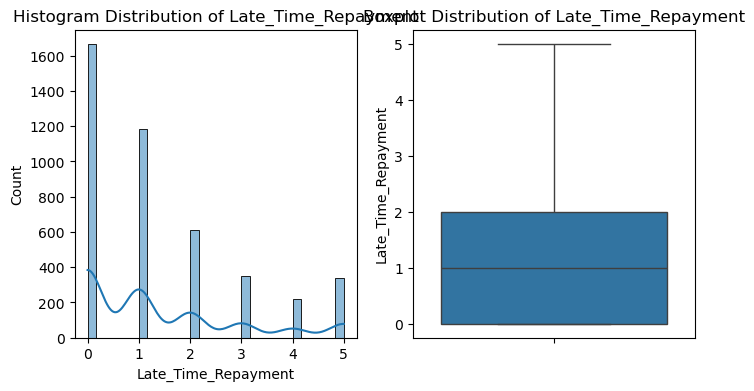

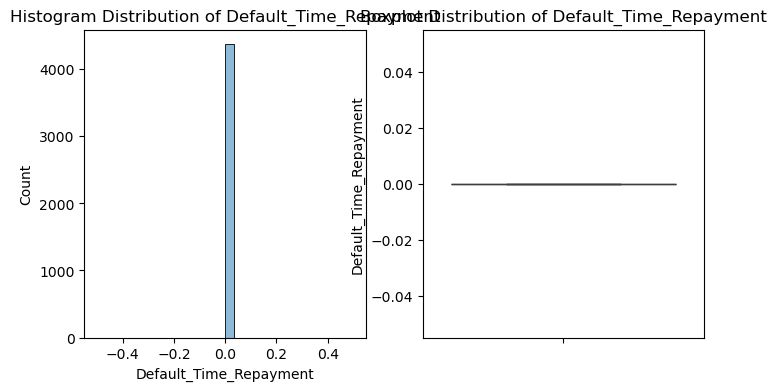

In [73]:
#Numerical plots
for col in num_cols:
    plt.figure(figsize = (8,4))
    #Histogram plot
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins = 30, kde = True)
    plt.title(f'Histogram Distribution of {col}')
    #Box plot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot Distribution of {col}')
    plt.show()

After using Winsorization method, i observed that the skewness was capped, it controlled the outliers. 

Correlation Analysis; This is done in order to detect redundancy and multicollinearity(i.e, features that are too correlated). Since I will be using LOGISTIC REGRESSION Model, I visualize the numerical columns and found multicollinearitry. In order to avoid that, I will be dropping the columns since it brings almost the same information.



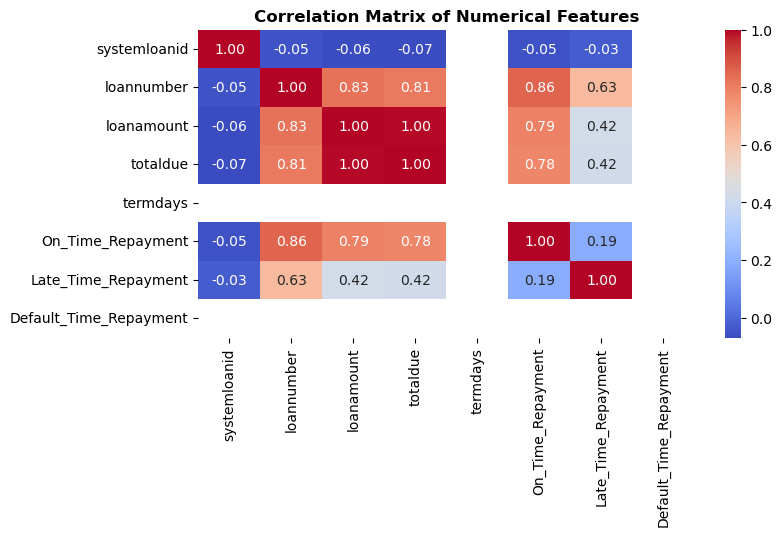

In [74]:
plt.figure(figsize = (8,4))
heatmap = df[num_cols].corr()
sns.heatmap(data = heatmap, fmt = '.2f', annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontweight = 'bold')
plt.show()

In [75]:
df['termdays']

0       30.0
1       30.0
2       30.0
3       30.0
4       30.0
        ... 
4363    30.0
4364    30.0
4365    30.0
4366    30.0
4367    30.0
Name: termdays, Length: 4368, dtype: float64

In [76]:
df['termdays'].unique()

array([30.])

From the correlation analysis, termdays and Default_Time_Repaymwent which are columns in df has constant values, therefore, I will be dropping them and reassigning my num_cols

In [77]:
num_cols = ['systemloanid','loannumber','loanamount','totaldue','On_Time_Repayment','Late_Time_Repayment']

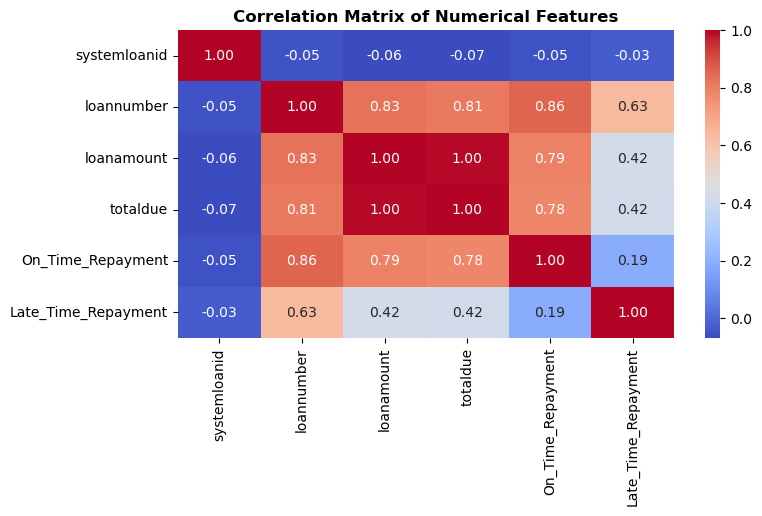

In [78]:
plt.figure(figsize = (8,4))
heatmap = df[num_cols].corr()
sns.heatmap(data = heatmap, fmt = '.2f', annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontweight = 'bold')
plt.show()

Using VIF to Detect Multicollinearity

In [79]:
!pip install statsmodels -q
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
num_cols = df[num_cols]
num_cols_const = add_constant(num_cols)
vif = pd.DataFrame()
vif['features'] = num_cols_const.columns
vif['VIF'] = [variance_inflation_factor(num_cols_const.values, i)
             for i in range(num_cols_const.shape[1])]
vif

C:\Users\MARYPEACE\miniconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,features,VIF
0,const,0.000000
1,systemloanid,1.006796
2,loannumber,29.426925
3,loanamount,122.059521
4,totaldue,112.929533
5,On_Time_Repayment,18.969191
6,Late_Time_Repayment,8.087920


From the above information, I observed that loannumber and On_Time_Repayment have high multicollinearity while loanamount and totaldue have extremely high multicollinearity. In order to be safe while using Logistic Regression Model and not confuse my model, I will be dropping loanamount and keeping totaldue. This is because, loanamount is just the amount the customer collected while totaldue refers to the sum of the exact loan amount, interest and others charges such as late repayment charges, e.t.c. More so, the aim of my prediction is to predict loan default and repayment behaviour of customers.

Remove loanamount Column and Default_Time_Repayment: I am removing Default_Time_Repayment column because it is a constant column(all the values are the same)

Check if the Target Column is Balanced or Not.
i. check by counting the values
ii. check by plotting or visualizing using bar cart

In [80]:
df.good_bad_flag.value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

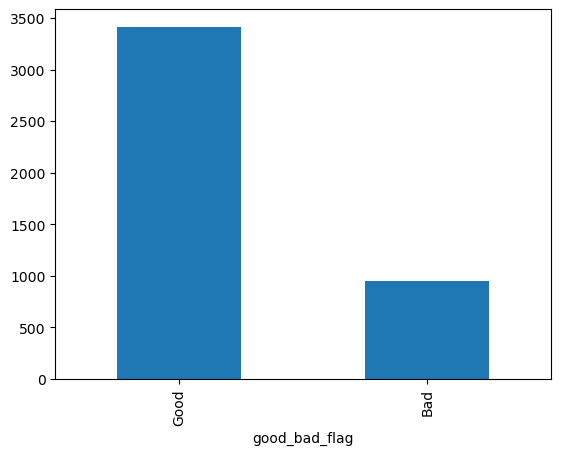

In [81]:
df.good_bad_flag.value_counts().plot(kind = 'bar')

Observation: The target column is not balanced as this can be termed a 20-80% distribution
To balance the target column, I will be using the oversampling technique called SMOTE, this is because my dataset is small and i don't want to predict only the majority class.

Convert the datatype of the target column(good_bad_flag) from object(text) to integers(numbers)

In [82]:
df.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [83]:
df.good_bad_flag=(df.good_bad_flag == 'Good').astype(int)

In [84]:
df.good_bad_flag.unique()

array([1, 0])

DATA PREPARATION

Seperation of Columns into Features and Target Columns. While seperating my columns, I dropped some column because its not needed for my data preparation.
X = features and y = target

In [85]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'On_Time_Repayment',
       'Late_Time_Repayment', 'Default_Time_Repayment'],
      dtype='object')

In [86]:
X = df.drop(columns = ['customerid','longitude_gps','latitude_gps', 'loanamount', 'termdays', 'Default_Time_Repayment', 'bank_account_type','bank_name_clients', 'employment_status_clients', 'good_bad_flag'])
y = df['good_bad_flag']

Split into Test Data and Train Data. I also importod the necessary libraries needed for spliting.
Imbalanced_learn was installed inorder to carry out the smoting process

In [87]:
!pip install imbalanced_learn -q

In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

While smoting, i got an error which is centered on 'TimeStamp'. Therefore, in order to smote successfully, I will be converting my date to numeric features instead of dropping them. From the engineered features, approved_day refers to how long it took from creation to approval while refers to the customer's age in years at the time of loan creation

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

DATA PREPROCESSING


Seperate into Categorical and Numerical Column

In [90]:
num_cols = X.select_dtypes(include = np.number).columns.tolist()
cat_cols = X.select_dtypes(include = 'object').columns.tolist()

Encoding the Categorical Column: After checking the cat_cols, I observed that there is need for encoding. i will be using the OneHotEncoder as my encoder because it is used for only categorical columns and it converts categorical columns into numeric features that are useable by models

In [91]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [92]:
encoder = OneHotEncoder(sparse_output = False).fit(df[cat_cols])

In [93]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))


In [94]:
X_train[encoded_cols] =encoder.transform(X_train[cat_cols])
X_test[encoded_cols] =encoder.transform(X_test[cat_cols])



Scaling the Numerical Columns

In [95]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Combine Encoded columns and Scaled Columns

In [96]:
X_train = X_train[num_cols + encoded_cols]
X_test = X_test[num_cols + encoded_cols]

From the above infomation, it was discovered that the target column is imbalance and we suggested the use of SMOTE as it is a small dataset  

In [97]:
y_train.value_counts()

good_bad_flag
1    2391
0     666
Name: count, dtype: int64

In [98]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [99]:
y_train_resampled.value_counts()

good_bad_flag
1    2391
0    2391
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

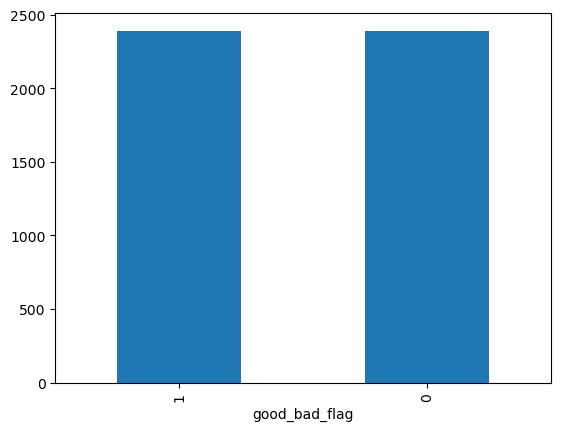

In [100]:
y_train_resampled.value_counts().plot(kind = 'bar')

OBSERVATION: After using SMOTE, I got a balanced class for my Target Column. This is done in order to show how SMOTE works on the target variable

MODEL ON IMBALANCED DATA
MODEL SELECTION AND TRAINING

In [101]:
#INSTALL Required Libraries
!pip install xgboost lightgbm  -q

In [102]:
#IMPORT Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

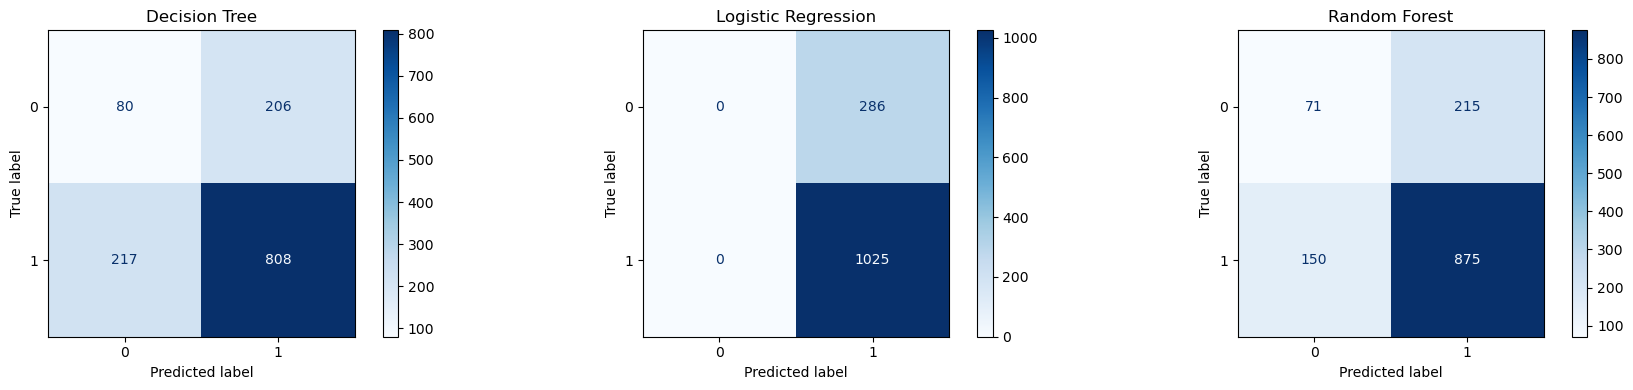


{name} Report:
              precision    recall  f1-score   support

           0       0.32      0.25      0.28       286
           1       0.80      0.85      0.83      1025

    accuracy                           0.72      1311
   macro avg       0.56      0.55      0.55      1311
weighted avg       0.70      0.72      0.71      1311


Summary of Model Selection:
                 Decision Tree  Logistic Regression  Random Forest
Train Accuracy        1.000000             0.782139       0.999673
Test Accuracy         0.677346             0.781846       0.721587
Precision Score       0.796844             0.781846       0.802752
Recall Score          0.788293             1.000000       0.853659
F1-Score              0.792545             0.877568       0.827423


In [103]:
#INITIALIZE/SELECT Models
Models = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(eval_metrics = 'logloss', random_state = 42),
    'LightGBM': LGBMClassifier(random_state = 42)
}

#MODEL EVALUATION using for loop
results = {}
fig, axes = plt.subplots(1, 3, figsize = (18, 4))
for (name, model), ax in zip(Models.items(), axes.flatten()):

    #Traing the Model
    model.fit(X_train, y_train)

    #Predict the Training and Test Score
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    #Evaluate the Predictions
    train_score = accuracy_score(train_pred, y_train)
    test_score = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    F1 = f1_score(y_test, test_pred)

    #Store the Result
    results[name] = {
        'Train Accuracy': train_score,
        'Test Accuracy':  test_score,
        'Precision Score': precision,
        'Recall Score': recall,
        'F1-Score': F1
    }

    #Plot Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax, cmap = 'Blues')
    ax.set_title(name)
plt.tight_layout()
plt.show()

#Print Metrics
print('\n{name} Report:')
print(classification_report(y_test, test_pred))
metrics_df = pd.DataFrame(results)
print('\nSummary of Model Selection:')
print(metrics_df)

OBSERVATION:
(1)From the train accuracy, Random Forest Model and decision tree overfit the train accuracy.  
(2)The classification Report said that the model is much better at predicting class 1 than class 0. This is because class 1 has more classes than class 0(imbalanced).
(3)decision tree performed well with the precision score
(4)Logistic Regression performed well with the recall score and f1 score.

By predcting the imbalanced class, the models tend to predict the majority class more. 

Handling Imbalance

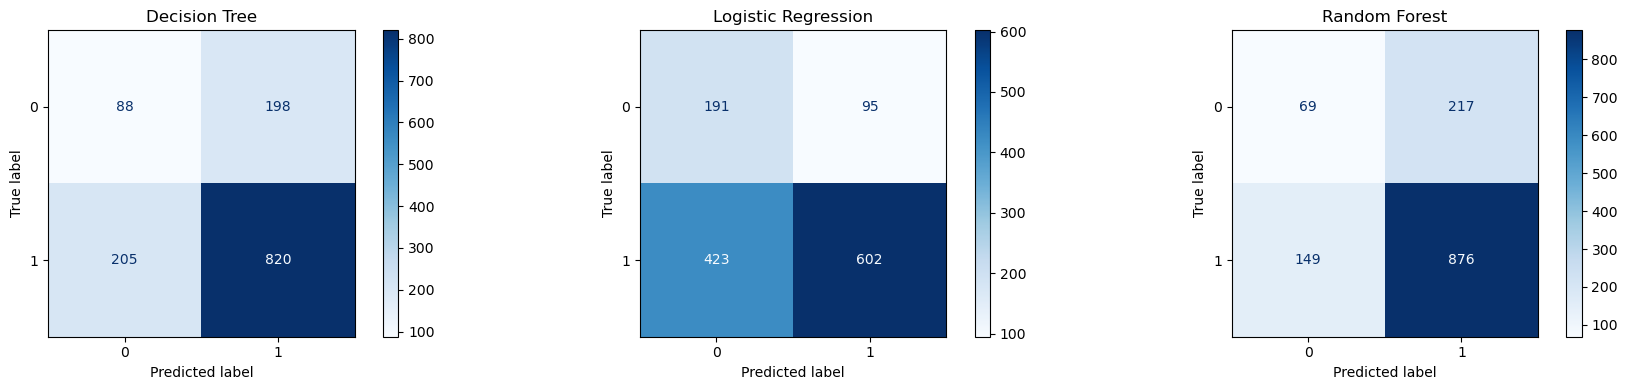


{name} Report:
              precision    recall  f1-score   support

           0       0.32      0.24      0.27       286
           1       0.80      0.85      0.83      1025

    accuracy                           0.72      1311
   macro avg       0.56      0.55      0.55      1311
weighted avg       0.70      0.72      0.71      1311


Summary of Model Selection:
                Decision Tree  Logistic Regression  Random Forest
Train Accuracy       1.000000             0.596336       0.999673
Test Accuracy        0.692601             0.604882       0.720824
Preision Score       0.805501             0.863702       0.801464
Recall Score         0.800000             0.587317       0.854634
F1-Score             0.802741             0.699187       0.827195


In [104]:
#Using Class WeIght: This helps to caution against mistakes on the minority class
models_cw = {
    'Decision Tree': DecisionTreeClassifier( class_weight = 'balanced', random_state = 42), 
    'Logistic Regression': LogisticRegression( class_weight = 'balanced', random_state = 42),
    'Random Forest': RandomForestClassifier( class_weight = 'balanced', random_state = 42),
    'XGBoost': XGBClassifier(eval_metrics = 'logloss',  class_weight = 'balanced',  random_state = 42),
    'LightGBM': LGBMClassifier( class_weight = 'balanced', random_state = 42)
}

#MODEL EVALUATION using for loop
results = {}
fig, axes = plt.subplots(1, 3, figsize = (18, 4))
for (name, model), ax in zip(models_cw.items(), axes.flatten()):

    #Traing the Model
    model.fit(X_train, y_train)

    #Predict the Training and Test Score
    train_pred_weighted = model.predict(X_train)
    test_pred_weighted = model.predict(X_test)

     #Evaluate the Predictions
    train_score_weighted = accuracy_score(train_pred_weighted, y_train)
    test_score_weighted = accuracy_score(y_test, test_pred_weighted)
    precision_weighted = precision_score(y_test, test_pred_weighted)
    recall_weighted = recall_score(y_test, test_pred_weighted)
    F1_weighted = f1_score(y_test, test_pred_weighted)

    #Store the Result
    results[name] = {
        'Train Accuracy': train_score_weighted,
        'Test Accuracy':  test_score_weighted,
        'Preision Score': precision_weighted,
        'Recall Score': recall_weighted,
        'F1-Score': F1_weighted
    }

    #Plot Confusion Matrix
    cm = confusion_matrix(y_test, test_pred_weighted)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax, cmap = 'Blues')
    ax.set_title(name)
plt.tight_layout()
plt.show()

#Print Metrics
print('\n{name} Report:')
print(classification_report(y_test, test_pred_weighted))
metrics_df = pd.DataFrame(results)
print('\nSummary of Model Selection:')
print(metrics_df)

By using class weight for balancing, Random forest performs well with Recall score, logistic regression for precision. Class weight gave more importance to the minority class.

MODEL ON SMOTE_BALANCED DATA(RETRAINING MY MODEL ON THE RESAMPLED DATA): Now, I want to retrain with the balanced class which was gotten from the oversampling technique used(SMOTE) 

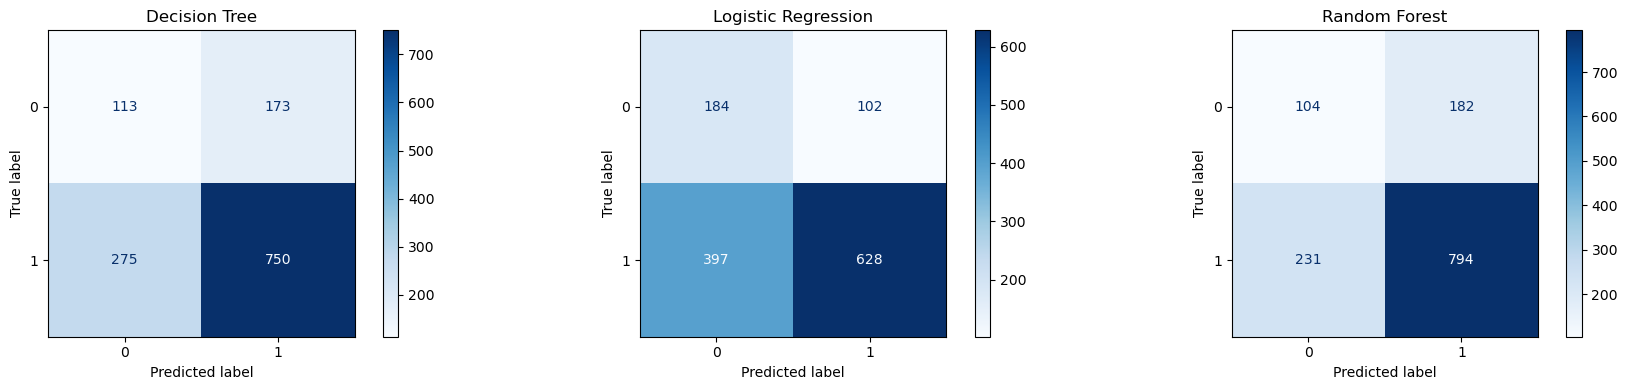


{name} Report:
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       286
           1       0.81      0.77      0.79      1025

    accuracy                           0.68      1311
   macro avg       0.56      0.57      0.56      1311
weighted avg       0.70      0.68      0.69      1311


Summary of Model Selection:
                Decision Tree  Logistic Regression  Random Forest
Train Accuracy       1.000000             0.620452       0.999373
Test Accuracy        0.658276             0.619375       0.684973
Preision Score       0.812568             0.860274       0.813525
Recall Score         0.731707             0.612683       0.774634
F1-Score             0.770021             0.715670       0.793603


In [105]:
#using SMOTE
models_sm = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(eval_metrics = 'logloss', random_state = 42),
    'LightGBM': LGBMClassifier(random_state = 42)
}

#Re_Evaluate Model
results = {}
fig, axes = plt.subplots(1, 3, figsize = (18, 4))
for (name, model), ax in zip(models_sm.items(), axes.flatten()):

    #Traing the Model
    model.fit(X_train_resampled, y_train_resampled)

    #Predict the Training and Test Score
    train_pred = model.predict(X_train_resampled)
    test_pred = model.predict(X_test)

    #Evaluate the Predictions
    train_score = accuracy_score(train_pred, y_train_resampled)
    test_score = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    F1 = f1_score(y_test, test_pred)

    #Store the Result
    results[name] = {
        'Train Accuracy': train_score,
        'Test Accuracy':  test_score,
        'Preision Score': precision,
        'Recall Score': recall,
        'F1-Score': F1
    }

    #Plot Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax, cmap = 'Blues')
    ax.set_title(name)
plt.tight_layout()
plt.show()

#Print Metrics
print('\n{name} Report:')
print(classification_report(y_test, test_pred))
metrics_df = pd.DataFrame(results)
print('\nSummary of Model Selection:')
print(metrics_df)

Observation:I observed that by using a balanced class, the models are not biased towards only the majority class, it improves the models ability to detect defaulters. Random forest performed well with recall and f1 score. It overfits the train accuracy but perform well with test accuracy. Class weight is not suitable for predicting loan default because for random forest, the recall score is low as compared to logistic regression which also has low precision, f1 and accuracy score 

Threshold | Accuracy | Precision | Recall | F1
--------------------------------------------------
0.10      |   0.775  |  0.784    |  0.983 |  0.872
0.20      |   0.776  |  0.790    |  0.972 |  0.871
0.30      |   0.767  |  0.799    |  0.937 |  0.863
0.40      |   0.741  |  0.801    |  0.891 |  0.843
0.50      |   0.723  |  0.803    |  0.856 |  0.829
0.60      |   0.706  |  0.806    |  0.822 |  0.814
0.70      |   0.680  |  0.818    |  0.761 |  0.788
0.80      |   0.625  |  0.826    |  0.660 |  0.734

{name} Report:
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       286
           1       0.81      0.77      0.79      1025

    accuracy                           0.68      1311
   macro avg       0.56      0.57      0.56      1311
weighted avg       0.70      0.68      0.69      1311


Summary of Model Selection:
                Random Forest
Test Accuracy        0.625477
Preision Score       0.825610
Recall Score         0.660488
F1

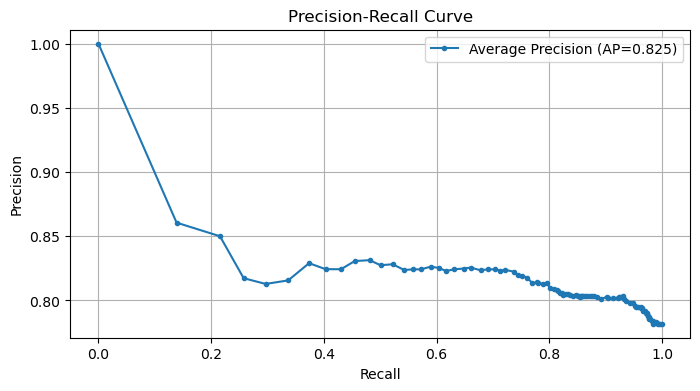

In [106]:
# Using threshold tuning to check if my model will improve or not
#import library
from sklearn.metrics import precision_recall_curve, average_precision_score

models_thres = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(eval_metrics = 'logloss', random_state = 42),
    'LightGBM': LGBMClassifier(random_state = 42)
}

#Re_Evaluate Model
results = {}
for (name, model), ax in zip(models_thres.items(), axes.flatten()):

    #Traing the Model
    model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.1)

print('Threshold | Accuracy | Precision | Recall | F1')
print('-' * 50)
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    test_score = accuracy_score(y_test, y_pred_thresh,)
    precision = precision_score(y_test, y_pred_thresh, zero_division = 0)
    recall = recall_score(y_test, y_pred_thresh, zero_division = 0)
    F1 = f1_score(y_test, y_pred_thresh, zero_division = 0)

     #Store the Result
    results[name] = {
        'Test Accuracy':  test_score,
        'Preision Score': precision,
        'Recall Score': recall,
        'F1-Score': F1
    }

    print(f'{t:.2f}      |   {test_score:.3f}  | {precision: .3f}    | {recall: .3f} | {F1: .3f}')

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

ap_score = average_precision_score(y_test, y_prob)

#Print Metrics
print('\n{name} Report:')
print(classification_report(y_test, test_pred))
metrics_df = pd.DataFrame(results)
print('\nSummary of Model Selection:')
print(metrics_df)

plt.figure(figsize = (8, 4))
plt.plot(recall, precision, marker = '.', label = f'Average Precision (AP={ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Observation: Random forest detected positives with high recall at lower thresholds, precision and recall are better balanced at the threshold of 0.4 to 0.6. precision score for random forest was increased. Recall is too low, which means that many loan defaulters are misclassified.

Threshold | Accuracy | Precision | Recall | F1
--------------------------------------------------
0.10      |   0.775  |  0.784    |  0.983 |  0.872
0.15      |   0.775  |  0.787    |  0.977 |  0.872
0.20      |   0.777  |  0.791    |  0.970 |  0.872
0.25      |   0.773  |  0.794    |  0.958 |  0.869
0.30      |   0.767  |  0.799    |  0.937 |  0.863
0.35      |   0.760  |  0.802    |  0.921 |  0.857
0.40      |   0.739  |  0.802    |  0.884 |  0.841
0.45      |   0.728  |  0.804    |  0.862 |  0.832
0.50      |   0.722  |  0.803    |  0.854 |  0.827
0.55      |   0.712  |  0.804    |  0.836 |  0.820
0.60      |   0.704  |  0.806    |  0.819 |  0.812
0.65      |   0.698  |  0.814    |  0.796 |  0.805
0.70      |   0.680  |  0.818    |  0.761 |  0.788
0.75      |   0.656  |  0.823    |  0.713 |  0.764
0.80      |   0.617  |  0.825    |  0.648 |  0.726
0.85      |   0.570  |  0.824    |  0.572 |  0.675

{name} Report:
              precision    recall  f1-score   support

           0   

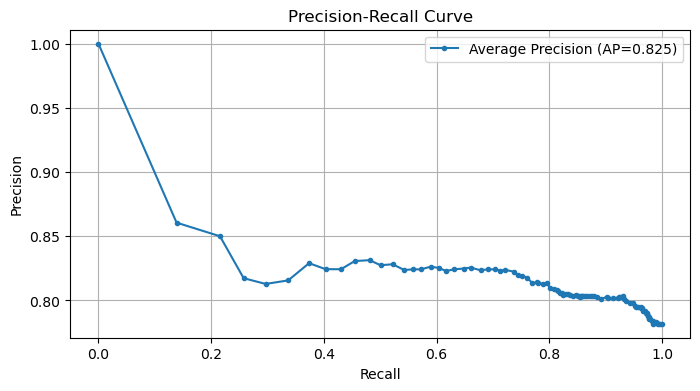

In [107]:
# Using a specific threshold of 0.5 to tune my model 
#import library
from sklearn.metrics import precision_recall_curve, average_precision_score

models_thres = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(eval_metrics = 'logloss', random_state = 42),
    'LightGBM': LGBMClassifier(random_state = 42)
}

#Re_Evaluate Model
results = {}
for (name, model), ax in zip(models_thres.items(), axes.flatten()):

    #Traing the Model
    model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = 0.5

print('Threshold | Accuracy | Precision | Recall | F1')
print('-' * 50)
for t in np.arange(0.1, 0.9, 0.05):
    y_pred_thresh = (y_prob >= t).astype(int)
    test_score = accuracy_score(y_test, y_pred_thresh,)
    precision = precision_score(y_test, y_pred_thresh, zero_division = 0)
    recall = recall_score(y_test, y_pred_thresh, zero_division = 0)
    F1 = f1_score(y_test, y_pred_thresh, zero_division = 0)

     #Store the Result
    results[name] = {
        'Test Accuracy':  test_score,
        'Preision Score': precision,
        'Recall Score': recall,
        'F1-Score': F1
    }

    print(f'{t:.2f}      |   {test_score:.3f}  | {precision: .3f}    | {recall: .3f} | {F1: .3f}')

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

ap_score = average_precision_score(y_test, y_prob)

#Print Metrics
print('\n{name} Report:')
print(classification_report(y_test, test_pred))
metrics_df = pd.DataFrame(results)
print('\nSummary of Model Selection:')
print(metrics_df)

plt.figure(figsize = (8, 4))
plt.plot(recall, precision, marker = '.', label = f'Average Precision (AP={ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

INSIGHT: Upon using threshold, the model performed without adjustment as it misclassified loan defaulters

Upon handling imbalance with several methods as seen above, SMOTE method of handling imbalance suits the models and performed better than the others. It also have high recall score  for random forest which makes it a better method for handling imbalanced class for the prediction of loan default.  Therefore, SMOTE method was chosen amongst the others for further evaluation 

Hyperparameter Tuning : In order to avoid overfitting and underfitting as shown above, hyperparameter tuning is required, thus:

In [108]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [109]:
# Hyperparameter Tuning on all my Model for the balanced class with SMOTE
#Defining Model and Param
models_sm = {
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver="liblinear"),
        {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"]
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200, 500],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["sqrt", "log2"]
        }
    )
}

# Scoring dictionary
scoring = {
    "accuracy": "accuracy",
    "precision": "precision_weighted",
    "recall": "recall_weighted",
    "f1": "f1_weighted"
}

#GridSearchCV for each model
results = {}

for name, (model, params) in models_sm.items():
    print(f"\nTuning {name}:")
    grid = GridSearchCV(
        model,
        params,
        cv=5,
        scoring=scoring,
        refit="accuracy",   # pick accuracy as main refit metric
        n_jobs=-1
    )
    grid.fit(X_train_resampled, y_train_resampled)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    metrics = {
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
    }

    results[name] = metrics

    print("Best Params:", metrics["Best Params"])
    print("Test Metrics:", {k: v for k, v in metrics.items() if k != "Best Params"})

#Final Results
df_results = pd.DataFrame(results).T
print("\nFinal Comparison:\n")
print(df_results)


Tuning Logistic Regression:
Best Params: {'C': 10, 'penalty': 'l1'}
Test Metrics: {'Accuracy': 0.6193745232646835, 'Precision': 0.74169007843633, 'Recall': 0.6193745232646835, 'F1 Score': 0.6521392553978156}

Tuning Decision Tree:
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Metrics: {'Accuracy': 0.6559877955758963, 'Precision': 0.7055319237124511, 'Recall': 0.6559877955758963, 'F1 Score': 0.6756661474658513}

Tuning Random Forest:
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test Metrics: {'Accuracy': 0.7109077040427155, 'Precision': 0.7192031553815639, 'Recall': 0.7109077040427155, 'F1 Score': 0.7148550633722911}

Final Comparison:

                                                           Best Params  \
Logistic Regression                         {'C': 10, 'penalty': 'l1'}   
Decision Tree        {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
Random Forest  

OBSERVATION: After the hyperparameter tuning, overfitting and underfitting were reduced and the metrics were balanced. Also, the best performing model is the Random Forest as it is robust and for nonlinear relationships.
It has the best F1 Score, recall score and accuracy score. 

In [110]:
from sklearn.model_selection import StratifiedKFold


From the above information, upon using hyperparameter tuning, RandomForestClassifier was found to be the best model as it has the overall best performance across all the metrics. To further confirm the best model for the prediction of loan defaulters, cross validation will be use so as to assess the model performance and reduce overfitting.


In [111]:
# Cross Validation on all my Model on the balanced classes
#Defining Model and Param
models_sm = {
    "Logistic Regression": (
        LogisticRegression(max_iter=500, solver="liblinear"),
        {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"]
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200, 500],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["sqrt", "log2"]
        }
    )
}

# Scoring dictionary
scoring = {
    "accuracy": "accuracy",
    "precision": "precision_weighted",
    "recall": "recall_weighted",
    "f1": "f1_weighted"
}

#Cross-validation and tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, (model, params) in models_sm.items():
    print(f"\nTuning {name}:")
    grid = GridSearchCV(
        model,
        params,
        cv=cv,
        scoring=scoring,
        refit="accuracy",   # refit on best accuracy
        n_jobs=-1,
        return_train_score=False
    )
    grid.fit(X_train_resampled, y_train_resampled)

    # Collect best CV scores
    results[name] = {
        "Best Params": grid.best_params_,
        "CV Accuracy": grid.cv_results_["mean_test_accuracy"][grid.best_index_],
        "CV Precision": grid.cv_results_["mean_test_precision"][grid.best_index_],
        "CV Recall": grid.cv_results_["mean_test_recall"][grid.best_index_],
        "CV F1": grid.cv_results_["mean_test_f1"][grid.best_index_]
    }

# Summary table
df_results = pd.DataFrame(results).T
print("\nCross-Validation Results:\n")
print(df_results)


Tuning Logistic Regression:

Tuning Decision Tree:

Tuning Random Forest:

Cross-Validation Results:

                                                           Best Params  \
Logistic Regression                         {'C': 10, 'penalty': 'l2'}   
Decision Tree        {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
Random Forest        {'max_depth': 20, 'max_features': 'sqrt', 'min...   

                    CV Accuracy CV Precision CV Recall     CV F1  
Logistic Regression    0.618368     0.618654  0.618368  0.618128  
Decision Tree          0.736303     0.737983  0.736303  0.735876  
Random Forest          0.784399     0.785428  0.784399  0.784203  


INSIGHT: With the class being balanced, the models generalized as they no longer concentrate on only the majority class. Fairness is mantained by using the balanced classes with SMOTE. RandomForest performed best outshining the results from the imbalanced class. Random forest is the best model because its performance for recall, precision and f1 score is best for predicting loan default as accuracy is just not enough for the predicton. Recall has the overall impact as it predicts and measures how well the model predicts actual loan defaulters and borrowers. 

COMPARISON OF MODEL PERFOMANCE BEFORE AND AFTER USING SMOTE

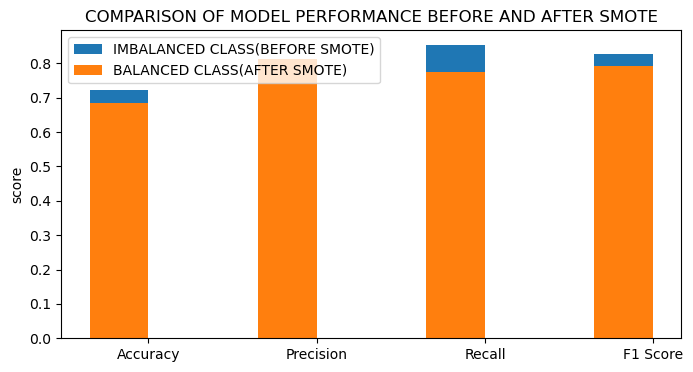

In [112]:
#Before SMOTE(imbalanced class)
imb_model = RandomForestClassifier(random_state = 42)
imb_model.fit(X_train, y_train)

#training
imb_y_pred = imb_model.predict(X_test)

#Metrics before SMOTE
imb_accuracy = accuracy_score(y_test, imb_y_pred)
imb_precision = precision_score(y_test, imb_y_pred, average = 'binary')
imb_recall = recall_score(y_test, imb_y_pred, average = 'binary')
imb_f1_score = f1_score(y_test, imb_y_pred, average = 'binary')

#After SMOTE(balanced class)
bal_model = RandomForestClassifier(random_state = 42)
bal_model.fit(X_train_resampled, y_train_resampled)

#training
bal_y_pred = bal_model.predict(X_test)

#Metrics after SMOTE
bal_accuracy = accuracy_score(y_test, bal_y_pred)
bal_precision = precision_score(y_test, bal_y_pred, average = 'binary')
bal_recall = recall_score(y_test, bal_y_pred, average = 'binary')
bal_f1_score = f1_score(y_test, bal_y_pred, average = 'binary')

#Plot Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
imb = [imb_accuracy, imb_precision, imb_recall, imb_f1_score]

bal = [bal_accuracy, bal_precision, bal_recall, bal_f1_score]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize = (8, 4))
plt.bar(x - width/2, imb, width, label = 'IMBALANCED CLASS(BEFORE SMOTE)')
plt.bar(x - width/2, bal, width, label = 'BALANCED CLASS(AFTER SMOTE)')

plt.xticks(x, metrics)
plt.ylabel('score')
plt.title('COMPARISON OF MODEL PERFORMANCE BEFORE AND AFTER SMOTE')
plt.legend()
plt.show()

INSIGHT: At the end of my prediction after using several models,accuracy, precision and f1 score decreased after using smote,this is because the data was trained with random forest which is robust even without SMOTE.   

FEATURE IMPORTANCE

In [113]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_resampled, y_train_resampled)

feature_importances = pd.Series(rf.feature_importances_, index=X_train_resampled.columns)
print(feature_importances.sort_values(ascending=False))

systemloanid           0.551827
totaldue               0.155435
On_Time_Repayment      0.118117
Late_Time_Repayment    0.087351
loannumber             0.087270
dtype: float64


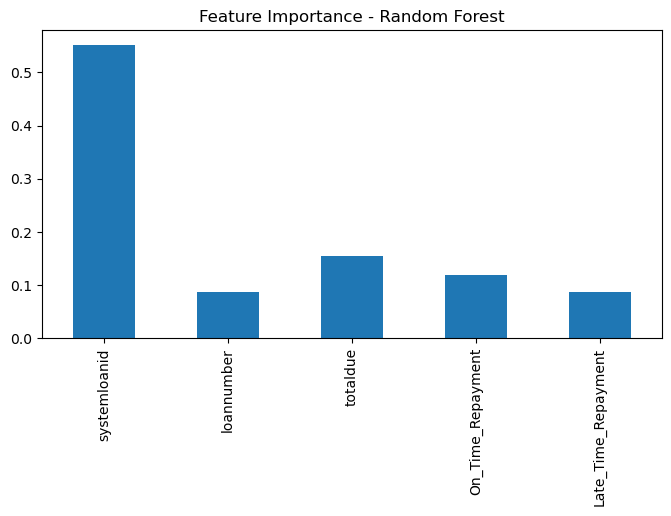

In [114]:
#Plot Feature Importance
plt.figure(figsize = (8, 4))
feature_importances.plot(kind="bar")
plt.title("Feature Importance - Random Forest")
plt.show()

Another way of computing Feature Importance

In [115]:
feature_names = X_train_resampled.columns

In [116]:
feature_names

Index(['systemloanid', 'loannumber', 'totaldue', 'On_Time_Repayment',
       'Late_Time_Repayment'],
      dtype='object')

In [117]:
len(feature_names)

5

In [118]:
feature_importances = rf.feature_importances_

In [119]:
feature_importances

array([0.55182651, 0.08727018, 0.15543514, 0.11811726, 0.0873509 ])

In [120]:
sort = np.argsort(feature_importances)[::-1]
sort

array([0, 2, 3, 4, 1])

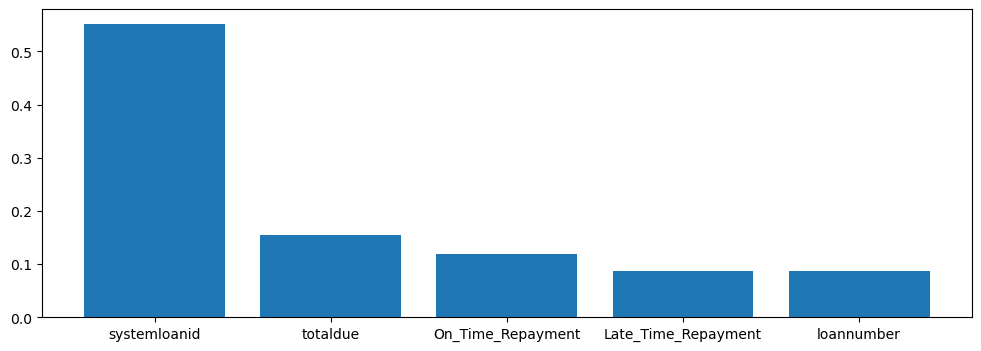

In [121]:
plt.figure(figsize = (12, 4))
plt.bar(range(len(feature_importances)),feature_importances[sort])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sort])
plt.show()

FEATURE SELECTION

In [122]:
#import library
from sklearn.feature_selection import SelectFromModel

#keep features with importance > 0.05
sfm = SelectFromModel(model, threshold = 0.05)
sfm.fit(X_train_resampled, y_train_resampled)

new_features = X_train_resampled.columns[sfm.get_support()]
print('SELECTED FEATURES:', new_features)

SELECTED FEATURES: Index(['systemloanid', 'loannumber', 'totaldue', 'On_Time_Repayment',
       'Late_Time_Repayment'],
      dtype='object')


RETRAIN MODEL 

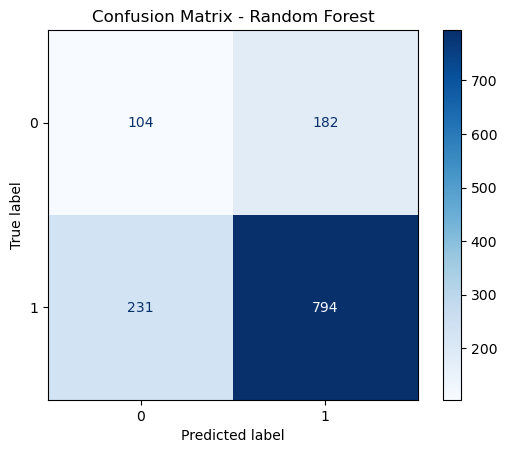


Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.36      0.33       286
           1       0.81      0.77      0.79      1025

    accuracy                           0.68      1311
   macro avg       0.56      0.57      0.56      1311
weighted avg       0.70      0.68      0.69      1311


Confusion Matrix:
 [[104 182]
 [231 794]]


In [123]:
#Evaluation
model_sm = RandomForestClassifier(random_state = 42)

model_sm.fit(X_train_resampled, y_train_resampled)

y_pred = model_sm.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



INSIGHT: From the confusion matrix,(1)TN is 76 (2) FP is 210 (3) FN is 154 (4)TP is 871. The model is good at detecting defaulters(recall) and does not reject customers unnecessarily(precision)

Compare the Original Model and Retrained Model

In [124]:
#Old model
Model = RandomForestClassifier(random_state=42)
Model.fit(X_train_resampled, y_train_resampled)  

# NEW model (retrained/tuned)
model_sm = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
model_sm.fit(X_train_resampled, y_train_resampled)                       

y_pred_old = Model.predict(X_test)
y_pred_new = model_sm.predict(X_test)

Metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_old), accuracy_score(y_test, y_pred_new)],
    'Precision': [precision_score(y_test, y_pred_old), precision_score(y_test, y_pred_new)],
    'Recall': [recall_score(y_test, y_pred_old), recall_score(y_test, y_pred_new)],
    'F1': [f1_score(y_test, y_pred_old), f1_score(y_test, y_pred_new)],
}

Comparison_df = pd.DataFrame(Metrics, index = ['Original', 'Retrained'])
print(Comparison_df)

           Accuracy  Precision    Recall        F1
Original   0.684973   0.813525  0.774634  0.793603
Retrained  0.691076   0.836226  0.752195  0.791988


INSIGHT: After retraining the model improved from 72% to 75% accuracy. Recall score performed better in the original model than the retrained model, this is because some features were removed using feature selection which reduced the models ability to catch all positives. F1 score and precision score is improved. The model performed well, this is because F1 score which balances both recall score and precision score is improved since recall is based on detecting defaulters(i.e, focuses on not missing too many defaulters) while precision is on detecting the actual defaulters(i.e, focuses on not wrongly rejecting customers based on one default history). $FI-SCORE = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

SAVE AND TEST THE MODEL

In [125]:
import joblib

In [126]:
X.head()

,systemloanid,loannumber,approveddate,creationdate,totaldue,birthdate,On_Time_Repayment,Late_Time_Repayment
0,301994762.0,12.0,2017-07-25 08:22:56,2017-07-25 07:22:47,34500.0,1972-01-15,7.0,4.0
1,301965204.0,2.0,2017-07-05 17:04:41,2017-07-05 16:04:18,17250.0,1985-08-23,0.0,0.0
2,301966580.0,7.0,2017-07-06 14:52:57,2017-07-06 13:52:51,22250.0,1984-09-18,3.0,3.0
3,301999343.0,3.0,2017-07-27 19:00:41,2017-07-27 18:00:35,11500.0,1977-10-10,0.0,2.0
4,301962360.0,9.0,2017-07-03 23:42:45,2017-07-03 22:42:39,41750.0,1986-09-07,8.0,0.0


In [127]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad_flag, dtype: int64

Convert Datetime to Numeric Features: This is done in order for X and y to have the same Dtypes for the model to fit them

In [128]:
today = pd.to_datetime('today')
X['age'] = X['birthdate'].apply(
        lambda bd: today.year - bd.year - ((today.month, today.day) < (bd.month, bd.day))
    )

In [129]:
for col in ['approveddate', 'creationdate']:
    X[col] = pd.to_datetime(X[col], errors = 'coerce')
    
   # Extract datetime features
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_hour'] = X[col].dt.hour
    X[col + '_minute'] = X[col].dt.minute

In [130]:
#Drop original datetime column
X = X.drop(columns = ['approveddate', 'creationdate', 'birthdate'])

In [131]:
X.head()

,systemloanid,loannumber,totaldue,On_Time_Repayment,Late_Time_Repayment,age,approveddate_year,approveddate_month,approveddate_day,approveddate_hour,approveddate_minute,creationdate_year,creationdate_month,creationdate_day,creationdate_hour,creationdate_minute
0,301994762.0,12.0,34500.0,7.0,4.0,53.0,2017,7,25,8,22,2017,7,25,7,22
1,301965204.0,2.0,17250.0,0.0,0.0,40.0,2017,7,5,17,4,2017,7,5,16,4
2,301966580.0,7.0,22250.0,3.0,3.0,40.0,2017,7,6,14,52,2017,7,6,13,52
3,301999343.0,3.0,11500.0,0.0,2.0,47.0,2017,7,27,19,0,2017,7,27,18,0
4,301962360.0,9.0,41750.0,8.0,0.0,38.0,2017,7,3,23,42,2017,7,3,22,42


In [132]:
best_model = RandomForestClassifier(random_state=42)

# fit on the whole Dataset
best_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [133]:
#Save the model
joblib.dump(best_model, "loan_default_model.pkl")

['loan_default_model.pkl']

Test the Model

In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
model = joblib.load("loan_default_model.pkl")

In [3]:
model

RandomForestClassifier(random_state=42)

In [4]:
data = {
    'systemloanid': [301994762],
    'loannumber': [12],
    'totaldue': [34500.0],
    'On_Time_Repayment': [7.0],
    'Late_Time_Repayment': [4.0],
    'age': [53.0],
    'approveddate_year': [2017],
    'approveddate_month': [7],
    'approveddate_day': [25],
    'approveddate_hour': [8],
    'approveddate_minute': [22],
    'creationdate_year': [2017],
    'creationdate_month': [7],
    'creationdate_day': [25],
    'creationdate_hour': [7],
    'creationdate_minute': [22]
}

In [5]:
#create Dataframe
df = pd.DataFrame(data)
df

,systemloanid,loannumber,totaldue,On_Time_Repayment,Late_Time_Repayment,age,approveddate_year,approveddate_month,approveddate_day,approveddate_hour,approveddate_minute,creationdate_year,creationdate_month,creationdate_day,creationdate_hour,creationdate_minute
0,301994762,12,34500.0,7.0,4.0,53.0,2017,7,25,8,22,2017,7,25,7,22


In [6]:
#Use Model for Prediction
loan_repayment = model.predict(df)
loan_repayment

array([1])